# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import wrangle as wrg
import env


#### Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [2]:
df = wrg.get_telco_data()
df.head(3)

Reading from csv file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [3]:
df = wrg.prep_telco(df)

In [4]:
df.head(3)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0


# Exercise 1

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
train, validate, test = wrg.split_data(df)

train <> (3937, 32)
validate <> (1688, 32)
test <> (1407, 32)


# Exercise 2

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
# Per the questions asked, were looking at specific features

features = ['monthly_charges', 'tenure', 'total_charges']


In [12]:
# Write the function

def plot_variable_pairs(train, columns, hue=None):
    '''
    The function takes in a df and a list of columns from the df
    and displays a pair plot wid a regression line.
    '''
    
    kws = {'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}
    sns.pairplot(train[columns], hue=hue, kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
    plt.show()

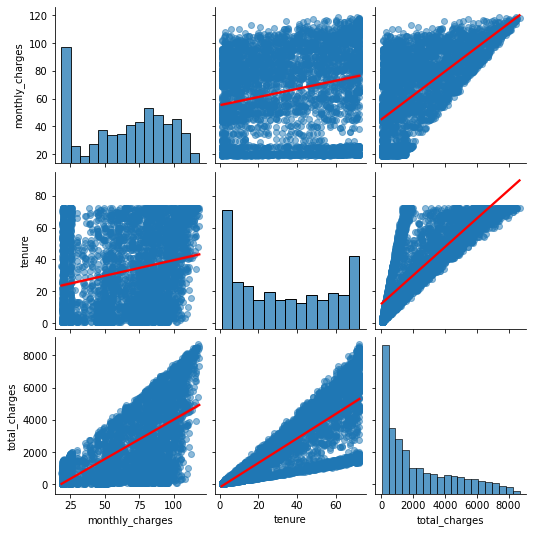

In [13]:
# Test it out
plot_variable_pairs(train, features)